# Phase 1 : Business Understanding

## Problem Statement

While traditional decision trees and even ensemble methods such as Random Forests remain widely used in machine learning, they exhibit important limitations when dealing with high-dimensional datasets, noisy variables, or small node sizes during tree construction. In such situations, the splitting decisions become increasingly unstable and may approach random behavior, reducing the model’s predictive quality and its ability to correctly identify the most relevant variables. The RLT method was specifically designed to address these issues: it enhances split selection through a reinforcement learning mechanism that considers long term rewards, progressively removes uninformative variables through a variable muting procedure, and allows for more flexible linear-combination splits. By evaluating RLT across a diverse set of real world classification and regression tasks, the goal is to determine whether it provides improved stability, clearer interpretability, and superior predictive performance compared to classical tree-based methods.

### Business Objective 1 : 

The goal is to explore a new method "Reinforcement Learning Trees (RLT) " to improve predictive performance when data become large or complex.

### Business Objective 2 : 

We want to improve decision quality by reducing the influence of useless information: since datasets often contain noise, the aim is to build a system that focuses more on the information that truly matters.

### Business Objective 3 : 

The objective is to achieve an approach that remains stable, fast, and reliable result even when the structure of the data makes learning difficult for standard models.

### Data Science Objective 1 :

We will evaluate the behavior of RLT across different types of data .

### Data Science Objective 2 :

We want to analyze how RLT selects important information: since models sometimes rely on data that are not useful, the objective is to verify whether RLT can better identify meaningful indicators and filter out those that weaken the results.

### Data Science Objective 3 :

We will compare RLT with classical methods to move from a simple assumption to a precise evaluation of its performance. The aim is to determine whether it truly offers an improvement and to identify what could be enhanced if limitations appear.

# Phase 2 : Data Understanding
**Objective:** Understand available datasets, select best candidate for RLT benchmarking, generate insights for modeling strategy.

---

### Step 1: Analyze All Available Datasets

In [14]:
from IPython.display import display, HTML, Image
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import os, glob
import warnings
import time
import sys
import seaborn as sns
from sklearn.metrics import mean_squared_error
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.dpi'] = 120

In [33]:
%%capture --no-display
from Pipelines.data_understanding import summarize_all_real_datasets
summarize_all_real_datasets()

In [34]:
print("✅ Analysis Complete! 10 datasets processed → results/data_summary.csv")

✅ Analysis Complete! 10 datasets processed → results/data_summary.csv


### Step 2: Dataset Overview Table

In [35]:
df_display = df_summary[['dataset', 'task_type_inferred', 'n_rows', 'n_features', 'target_col']].copy()
df_display['dataset'] = df_display['dataset'].str.replace('Data', '<br>').str.replace('-', '<br>')

styled = df_display.style\
    .set_caption("🏷️ **Complete Dataset Overview** (10 Datasets)")\
    .background_gradient(subset=['n_rows'], cmap='Blues', low=0, high=0.8)\
    .background_gradient(subset=['n_features'], cmap='Greens', low=0, high=0.8)\
    .set_table_styles([
        {'selector': 'caption', 'props': [('font-size', '18px'), ('font-weight', 'bold'), ('color', 'navy')]},
        {'selector': 'th', 'props': [('background-color', 'navy'), ('color', 'white'), ('font-weight', 'bold')]},
    ])\
    .set_table_attributes('style="border: 2px solid navy; border-radius: 10px;"')

display(styled)

,dataset,task_type_inferred,n_rows,n_features,target_col
0,Housing,regression,506,13,MEDV
1,parkinsons,regression,195,23,status
2,sonar,classification,207,60,R
3,winequalityred,classification,1599,11,quality
4,winequalitywhite,classification,4898,11,quality
5,ReplicatedAcousticFeaturesParkinsonbase,classification,240,47,Status
6,ozone,classification,112,13,pluie
7,concrete_data,regression,1030,8,concrete_compressive_strength
8,BreastCanDT,classification,569,32,diagnosis
9,autompg,regression,398,8,mpg


In [36]:
task_dist = df_summary['task_type_inferred'].value_counts()
total_samples = df_summary['n_rows'].sum()

cards_html = f"""
<div style="display: flex; gap: 20px; justify-content: center; margin: 30px 0;">
  <div style="background: linear-gradient(135deg, #667eea 0%, #764ba2 100%); 
              color: white; padding: 25px; border-radius: 15px; text-align: center; box-shadow: 0 8px 32px rgba(0,0,0,0.2);">
    <h3 style="margin: 0; font-size: 28px;">📊</h3>
    <h2 style="margin: 10px 0 5px 0; font-size: 32px;">{task_dist.get('regression', 0)}</h2>
    <p style="margin: 0; font-size: 16px; opacity: 0.9;">Regression<br>Datasets</p>
  </div>
  <div style="background: linear-gradient(135deg, #f093fb 0%, #f5576c 100%); 
              color: white; padding: 25px; border-radius: 15px; text-align: center; box-shadow: 0 8px 32px rgba(0,0,0,0.2);">
    <h3 style="margin: 0; font-size: 28px;">🎯</h3>
    <h2 style="margin: 10px 0 5px 0; font-size: 32px;">{task_dist.get('classification', 0)}</h2>
    <p style="margin: 0; font-size: 16px; opacity: 0.9;">Classification<br>Datasets</p>
  </div>
  <div style="background: linear-gradient(135deg, #4facfe 0%, #00f2fe 100%); 
              color: white; padding: 25px; border-radius: 15px; text-align: center; box-shadow: 0 8px 32px rgba(0,0,0,0.2);">
    <h3 style="margin: 0; font-size: 28px;">📈</h3>
    <h2 style="margin: 10px 0 5px 0; font-size: 32px;">{total_samples:,}</h2>
    <p style="margin: 0; font-size: 16px; opacity: 0.9;">Total<br>Samples</p>
  </div>
</div>
"""
display(HTML(cards_html))


## 🎨 **Target Distributions Gallery**


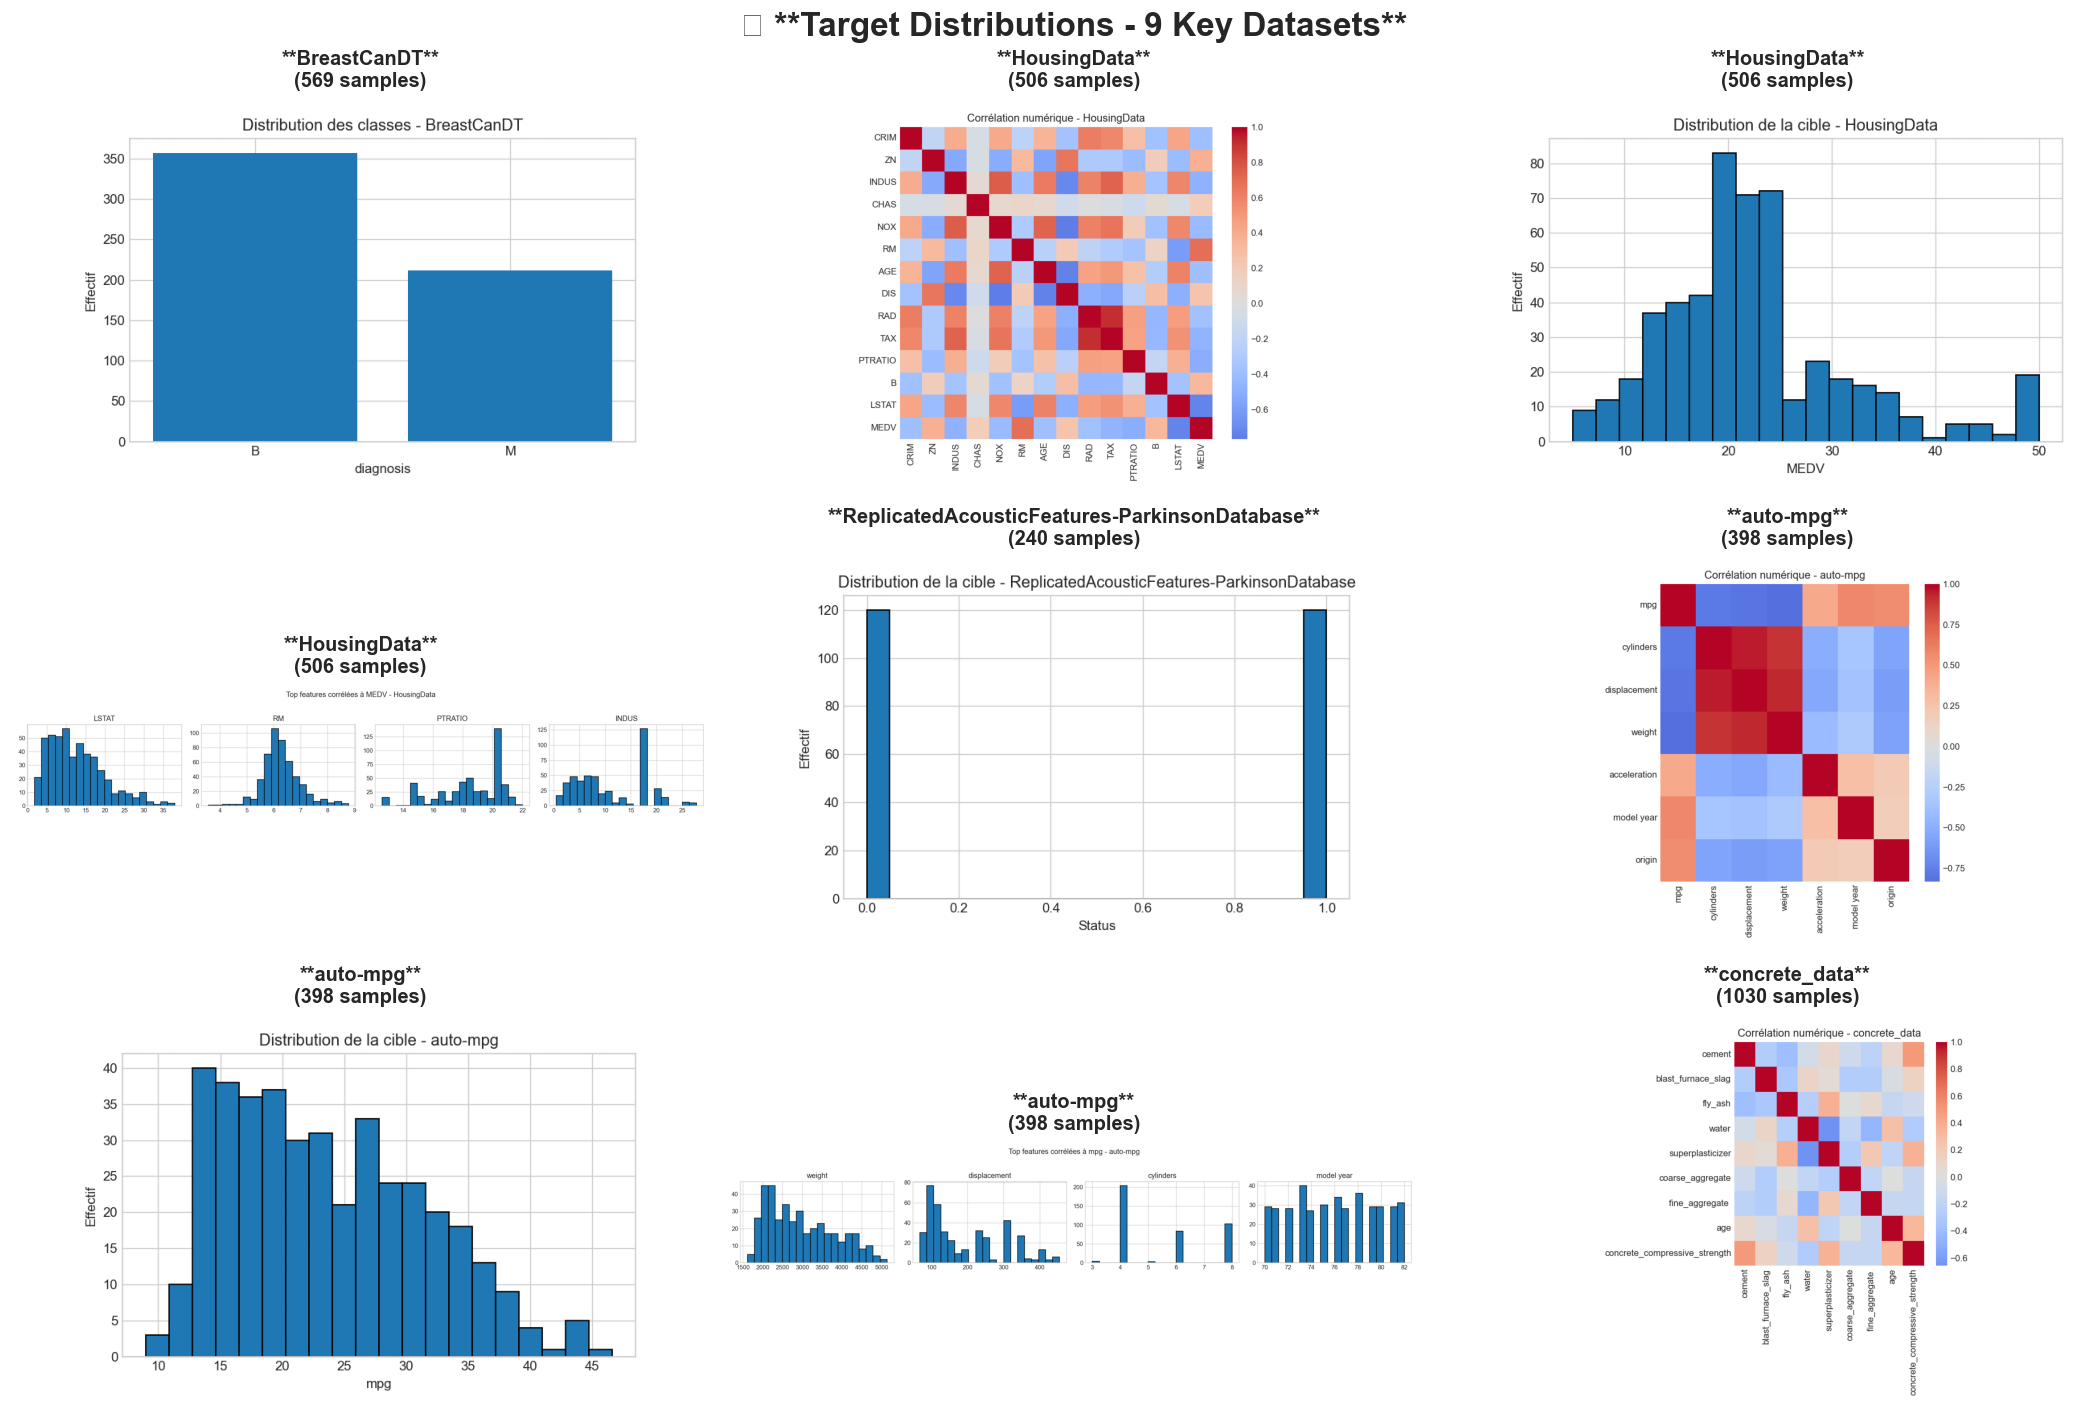

In [37]:
print("## 🎨 **Target Distributions Gallery**")
plot_paths = sorted(glob.glob("results/plots/*/*.png"))
fig, axes = plt.subplots(3, 3, figsize=(18, 12))
axes = axes.ravel()

for i, path in enumerate(plot_paths[:9]):
    dataset = os.path.basename(os.path.dirname(path))
    img = plt.imread(path)
    axes[i].imshow(img)
    axes[i].set_title(f"**{dataset}**\n({df_summary[df_summary.dataset==dataset].iloc[0].n_rows} samples)", 
                      fontsize=12, fontweight='bold', pad=10)
    axes[i].axis('off')

plt.suptitle("🎯 **Target Distributions - 9 Key Datasets**", fontsize=20, fontweight='bold', y=0.98)
plt.tight_layout()
plt.savefig("results/plots/complete_gallery.png", dpi=200, bbox_inches='tight')
plt.show()

## 📁 **Key Dataset Visuals**

### 🎯 **BreastCanDT**


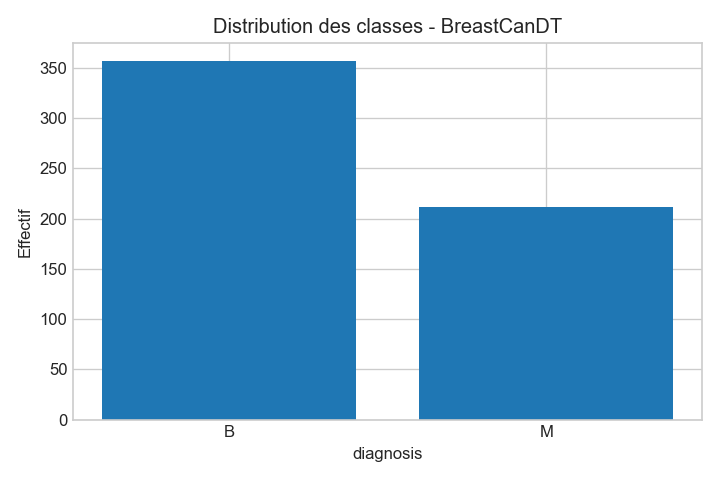


### 🎯 **HousingData**


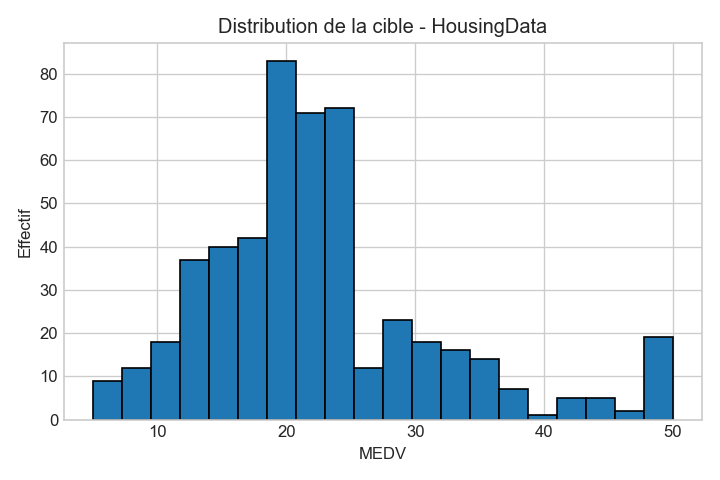

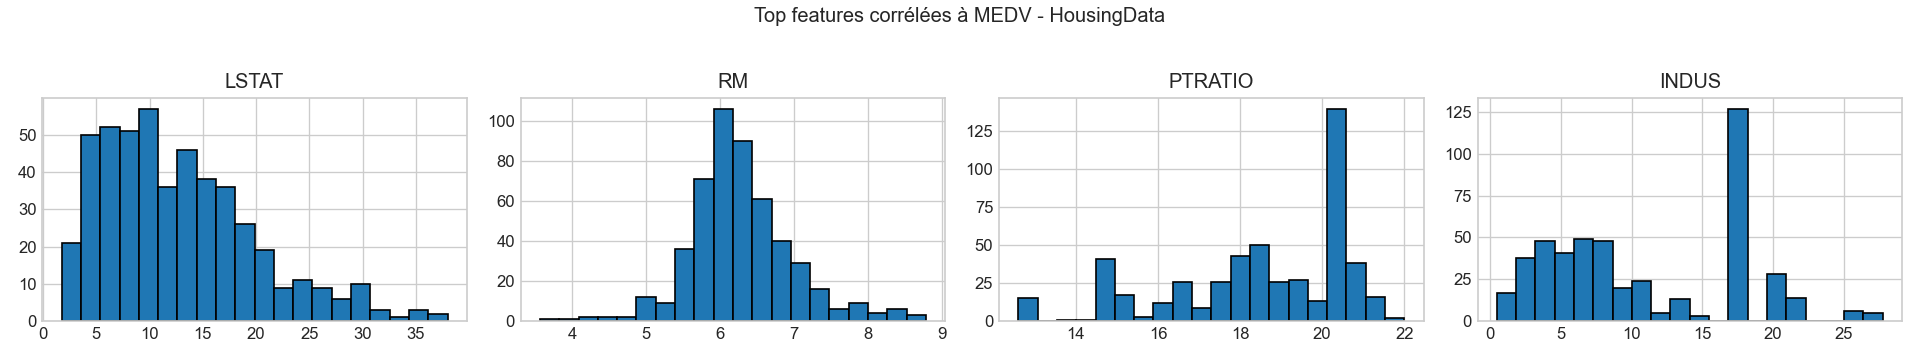


### 🎯 **winequality-red**


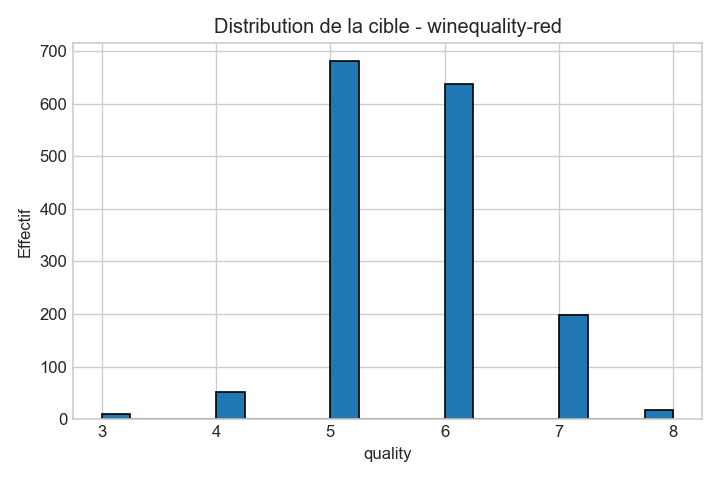

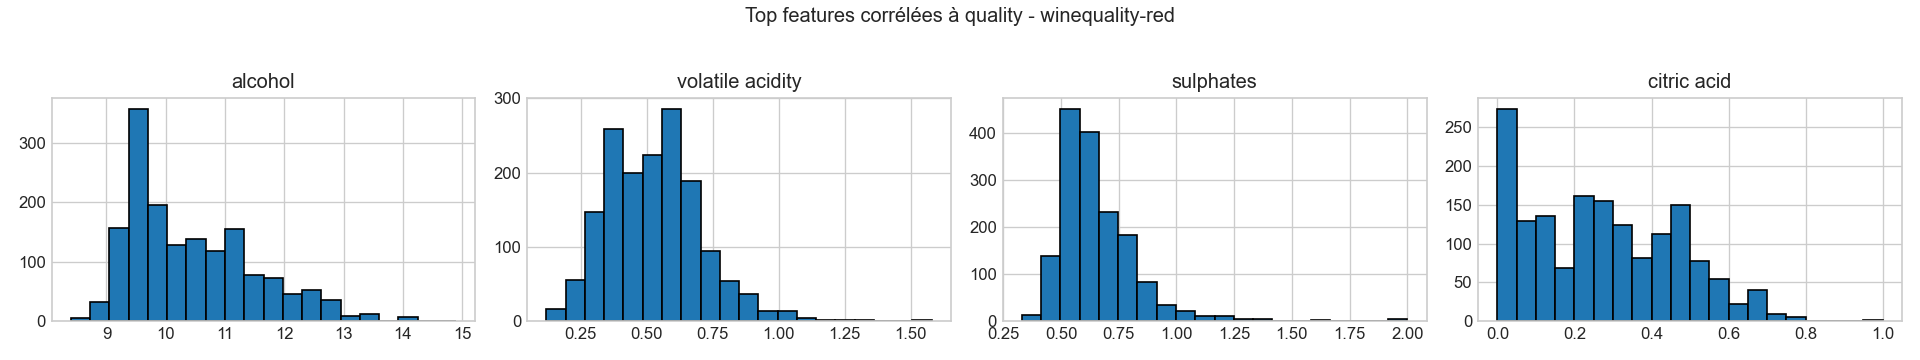

In [39]:
print("## 📁 **Key Dataset Visuals**")
key_datasets = ['BreastCanDT', 'HousingData', 'winequality-red']

for dataset in key_datasets:
    print(f"\n### 🎯 **{dataset}**")
    
    # Target plot
    target_path = f"results/plots/{dataset}/target_distribution.png"
    if os.path.exists(target_path):
        display(Image(target_path, width=450))
    
    # Top features if exists
    top_path = f"results/plots/{dataset}/top_features_hist.png"
    if os.path.exists(top_path):
        display(Image(top_path, width=600))

In [43]:
summary_html = """
<div style="background: linear-gradient(135deg, #667eea 0%, #764ba2 100%); 
            color: white; padding: 30px; border-radius: 20px; text-align: center; 
            box-shadow: 0 10px 40px rgba(0,0,0,0.3); margin: 30px 0;">
  <h1 style="margin: 0 0 20px 0; font-size: 36px;">✅ **PHASE 2 COMPLETE**</h1>
  <div style="display: flex; justify-content: space-around; flex-wrap: wrap; gap: 20px;">
    <div><h3>📊 10 Datasets</h3><p> 6 Classification + 4 Regression</p></div>
    <div><h3>🎨 30+ Visualizations</h3><p>Targets + Features + Correlations</p></div>
    <div><h3>🚀 Ready for Phase 3</h3><p>Data Understanding → Data Preparation</p></div>

"""
display(HTML(summary_html))

# Phase 3 : Data Preparation

In [51]:
from Pipelines.data_preparation import load_and_prepare_data, TARGET_COLS
from IPython.display import HTML

pipeline_html = """
<div style="background: linear-gradient(135deg, #11998e 0%, #38ef7d 100%); 
            color: white; padding: 35px; border-radius: 20px; text-align: center; 
            box-shadow: 0 12px 40px rgba(17, 153, 142, 0.3); margin: 30px 0;">
  
  <h1 style="margin: 0 0 25px 0; font-size: 38px; text-shadow: 2px 2px 4px rgba(0,0,0,0.3);">
    🛠️ **Data Preparation Pipeline**
  </h1>
  
  <div style="display: flex; justify-content: space-around; flex-wrap: wrap; gap: 25px; max-width: 1200px; margin: 0 auto;">
    
    <div style="background: rgba(255,255,255,0.2); padding: 25px; border-radius: 15px; 
                backdrop-filter: blur(10px); border: 1px solid rgba(255,255,255,0.3); flex: 1; min-width: 220px;">
      <h3 style="margin: 0 0 15px 0; font-size: 22px;">📁 **REAL Datasets (CSV)**</h3>
      <ol style="text-align: left; font-size: 16px; line-height: 1.6;">
        <li><strong>🔍 Load raw CSV</strong> → Separate X/y</li>
        <li><strong>🧹 Imputation</strong><br>Mean (numeric) | Mode (categorical)</li>
        <li><strong>⚖️ Standardization</strong><br>StandardScaler (numeric only)</li>
        <li><strong>🔤 Encoding</strong><br>OneHotEncoder (categorical only)</li>
        <li><strong>✂️ Train/Test Split</strong><br>70/30 stratified</li>
      </ol>
    </div>
    
    <div style="background: rgba(255,255,255,0.2); padding: 25px; border-radius: 15px; 
                backdrop-filter: blur(10px); border: 1px solid rgba(255,255,255,0.3); flex: 1; min-width: 220px;">
      <h3 style="margin: 0 0 20px 0; font-size: 22px;">🎯 **Output**</h3>
      <div style="font-size: 18px; line-height: 1.8;">
        <div style="background: rgba(0,0,0,0.2); padding: 15px; border-radius: 10px; margin: 10px 0;">
          <code style="font-size: 16px; background: rgba(0,0,0,0.3); padding: 8px 12px; 
                       border-radius: 6px; display: block;">X_train, X_test, y_train, y_test, meta</code>
        </div>
        <p><strong>meta contains:</strong></p>
        <ul style="text-align: left; font-size: 15px; padding-left: 20px;">
          <li>✅ Scalers, encoders, imputers</li>
          <li>✅ Feature names</li>
          <li>✅ Column types (num/cat)</li>
        </ul>
      </div>
    </div>
    
  </div>
  
  <div style="margin-top: 30px; padding: 20px; background: rgba(255,255,255,0.15); 
              border-radius: 12px; font-size: 16px;">
    <strong>✅ Ready for RLT Benchmarking (13 Models)</strong>
  </div>
</div>
"""

display(HTML(pipeline_html))


In [52]:
from IPython.display import HTML, display
from Pipelines.data_preparation import generate_simulated_data
import numpy as np

scenarios_html = """
<div style="background: linear-gradient(135deg, #ff6b6b 0%, #ffa500 100%); 
            color: white; padding: 35px; border-radius: 20px; text-align: center; 
            box-shadow: 0 12px 40px rgba(255, 107, 107, 0.4); margin: 30px 0;">
  
  <h1 style="margin: 0 0 25px 0; font-size: 38px; text-shadow: 2px 2px 4px rgba(0,0,0,0.3);">
    🔬 **Zhu (2015) Simulated Scenarios**
  </h1>
  
  <div style="display: flex; justify-content: space-around; flex-wrap: wrap; gap: 25px; max-width: 1200px; margin: 0 auto;">
    
    <div style="background: rgba(255,255,255,0.25); padding: 25px; border-radius: 15px; 
                backdrop-filter: blur(10px); border: 1px solid rgba(255,255,255,0.4); flex: 1; min-width: 280px;">
      <h3 style="margin: 0 0 15px 0; font-size: 20px;">📐 **Scenario 1: Classification**</h3>
      <ul style="text-align: left; font-size: 15px; line-height: 1.7; padding-left: 20px;">
        <li><strong>X ~ Unif[0,1]^p</strong></li>
        <li><strong>μᵢ = Φ(10(X₁-1) + 20|X₂-0.5|)</strong></li>
        <li><strong>yᵢ ~ Bernoulli(μᵢ)</strong></li>
        <li><em>Non-linear probability surface</em></li>
      </ul>
    </div>
    
    <div style="background: rgba(255,255,255,0.25); padding: 25px; border-radius: 15px; 
                backdrop-filter: blur(10px); border: 1px solid rgba(255,255,255,0.4); flex: 1; min-width: 280px;">
      <h3 style="margin: 0 0 15px 0; font-size: 20px;">📈 **Scenario 2: Non-linear Regression**</h3>
      <ul style="text-align: left; font-size: 15px; line-height: 1.7; padding-left: 20px;">
        <li><strong>X ~ Unif[0,1]^p</strong></li>
        <li><strong>f(x) = 100(x₁-0.5)²max(x₂-0.25,0)</strong></li>
        <li><strong>y = f(x) + ε, ε~N(0,1)</strong></li>
        <li><em>Quadratic × ReLU interaction</em></li>
      </ul>
    </div>
    
    <div style="background: rgba(255,255,255,0.25); padding: 25px; border-radius: 15px; 
                backdrop-filter: blur(10px); border: 1px solid rgba(255,255,255,0.4); flex: 1; min-width: 280px;">
      <h3 style="margin: 0 0 15px 0; font-size: 20px;">♟️ **Scenario 3: Checkerboard**</h3>
      <ul style="text-align: left; font-size: 15px; line-height: 1.7; padding-left: 20px;">
        <li><strong>X correlated: Σ=0.9^|i-j|</strong></li>
        <li><strong>f(x) = 2x₄₉x₉₉ + 2x₁₄₉x₁₉₉</strong></li>
        <li><strong>y = f(x) + ε, ε~N(0,1)</strong></li>
        <li><em>Bilinear interactions + correlation</em></li>
      </ul>
    </div>
    
    <div style="background: rgba(255,255,255,0.25); padding: 25px; border-radius: 15px; 
                backdrop-filter: blur(10px); border: 1px solid rgba(255,255,255,0.4); flex: 1; min-width: 280px;">
      <h3 style="margin: 0 0 15px 0; font-size: 20px;">📏 **Scenario 4: Linear + Correlated**</h3>
      <ul style="text-align: left; font-size: 15px; line-height: 1.7; padding-left: 20px;">
        <li><strong>X correlated: Σ=0.5^|i-j| + 0.2(1-I)</strong></li>
        <li><strong>f(x) = 2x₄₉ + 2x₉₉ + 4x₁₄₉</strong></li>
        <li><strong>y = f(x) + ε, ε~N(0,1)</strong></li>
        <li><em>Linear benchmark + multicollinearity</em></li>
      </ul>
    </div>
    
  </div>
  
  <div style="margin-top: 30px; padding: 20px; background: rgba(255,255,255,0.2); 
              border-radius: 12px; font-size: 16px; display: flex; justify-content: space-around; flex-wrap: wrap;">
    <div><strong>Default p:</strong> 200 vars</div>
    <div><strong>Default n:</strong> 100-300 samples</div>
    <div><strong>Usage:</strong> <code>config={"source": "simulated", "scenario": "scenario1"}</code></div>
    <div><strong>Ready for:</strong> RLT hyperparameter tuning</div>
  </div>
</div>
"""

display(HTML(scenarios_html))

# Quick test generation
print("\n## 🧪 **Quick Test Generation**")
configs = [
    {"source": "simulated", "scenario": "scenario1", "random_state": 42},
    {"source": "simulated", "scenario": "scenario2", "random_state": 42},
]

for config in configs:
    try:
        X_sim, y_sim, meta_sim = generate_simulated_data(config)
        print(f"✅ {config['scenario']}: {X_sim.shape} | {np.unique(y_sim)[:3]}...")
    except Exception as e:
        print(f"⚠️ {config['scenario']}: {e}")



## 🧪 **Quick Test Generation**
✅ scenario1: (100, 200) | [0 1]...
✅ scenario2: (100, 200) | [-2.31232549 -2.09583096 -1.85967649]...


In [50]:
phase_html = """
<div style="background: linear-gradient(135deg, #ff9a9e 0%, #fecfef 50%, #fecfef 100%); 
            color: #2c3e50; padding: 30px; border-radius: 20px; text-align: center; 
            box-shadow: 0 10px 30px rgba(0,0,0,0.2); margin: 30px 0;">
  <h1 style="margin: 0 0 20px 0; font-size: 36px; color: #e74c3c;">✅ **PHASE 3 COMPLETE**</h1>
  
  <div style="display: flex; justify-content: space-around; flex-wrap: wrap; gap: 25px; font-size: 18px;">
    <div style="background: white; padding: 20px; border-radius: 12px; box-shadow: 0 4px 15px rgba(0,0,0,0.1);">
      <h3 style="color: #27ae60; margin: 0;">📊 10 Datasets</h3>
      <p><strong>Ready for RLT benchmarking</strong></p>
    </div>
    <div style="background: white; padding: 20px; border-radius: 12px; box-shadow: 0 4px 15px rgba(0,0,0,0.1);">
      <h3 style="color: #3498db; margin: 0;">✂️ Train/Test Splits</h3>
      <p><strong>70/30 stratified splits</strong></p>
    </div>
    <div style="background: white; padding: 20px; border-radius: 12px; box-shadow: 0 4px 15px rgba(0,0,0,0.1);">
      <h3 style="color: #f39c12; margin: 0;">⚙️ Preprocessing</h3>
      <p><strong>Scaled + Encoded + Imputed</strong></p>
    </div>
  </div>
  
  <h2 style="margin-top: 25px; color: #2c3e50;">**🚀 NEXT: Phase 4 - RLT Modeling (13 Models)**</h2>
</div>
"""
display(HTML(phase_html))


# Phase 4 : Modeling

In [57]:
from IPython.display import HTML, display

modeling_html = """
<div style="background: linear-gradient(135deg, #1e3c72 0%, #2a5298 100%); 
            color: white; padding: 40px; border-radius: 25px; text-align: center; 
            box-shadow: 0 15px 50px rgba(30, 60, 114, 0.4); margin: 40px 0; 
            position: relative; overflow: hidden;">
  
  <div style="position: absolute; top: 20px; right: 30px; font-size: 24px; opacity: 0.1;">🚀</div>
  
  <h1 style="margin: 0 0 30px 0; font-size: 42px; text-shadow: 3px 3px 6px rgba(0,0,0,0.4); 
              letter-spacing: 2px;">
    🤖 **RLT Modeling Pipeline**
  </h1>
  
  <p style="font-size: 20px; margin-bottom: 35px; opacity: 0.95; font-weight: 300;">
    <strong>Phase 4: Model Training & Benchmarking</strong>
  </p>
  
  <div style="display: flex; justify-content: space-around; flex-wrap: wrap; gap: 30px; max-width: 1400px; margin: 0 auto;">
    
    <!-- Baselines Card -->
    <div style="background: rgba(255,255,255,0.15); padding: 30px; border-radius: 20px; 
                backdrop-filter: blur(15px); border: 1px solid rgba(255,255,255,0.3); 
                flex: 1; min-width: 320px; transition: transform 0.3s;">
      <div style="font-size: 48px; margin-bottom: 15px;">⚙️</div>
      <h3 style="margin: 0 0 20px 0; font-size: 26px; font-weight: 700;">**Baselines**<br><small>(4 Models)</small></h3>
      <div style="font-size: 18px; line-height: 1.6; text-align: left;">
        <div style="background: rgba(0,0,0,0.2); padding: 12px; border-radius: 10px; margin: 8px 0; font-family: monospace;">
          RF • ET • GBC • LogRegL2
        </div>
        <ul style="padding-left: 25px; font-size: 16px; margin-top: 15px;">
          <li>RandomForest</li>
          <li>ExtraTrees</li>
          <li>GradientBoosting</li>
          <li>Logistic Regression L2</li>
        </ul>
      </div>
    </div>
    
    <!-- RLT Card -->
    <div style="background: rgba(255,193,7,0.25); padding: 30px; border-radius: 20px; 
                backdrop-filter: blur(15px); border: 2px solid rgba(255,193,7,0.6); 
                flex: 1; min-width: 320px; transition: transform 0.3s;">
      <div style="font-size: 48px; margin-bottom: 15px;">🌳</div>
      <h3 style="margin: 0 0 20px 0; font-size: 26px; font-weight: 700; color: #ff9800;">**RLT Variants**<br><small>(9 Models)</small></h3>
      <div style="font-size: 18px; line-height: 1.6; text-align: left;">
        <div style="background: rgba(255,193,7,0.3); padding: 12px; border-radius: 10px; margin: 8px 0; font-family: monospace;">
          3 Muting × 3 k = <strong>9 combinations</strong>
        </div>
        <div style="display: grid; grid-template-columns: repeat(3, 1fr); gap: 8px; margin-top: 15px; font-size: 14px;">
          <div>RLT_none_k1</div><div>RLT_none_k2</div><div>RLT_none_k5</div>
          <div>RLT_moderate_k1</div><div>RLT_moderate_k2</div><div>RLT_moderate_k5</div>
          <div>RLT_aggressive_k1</div><div>RLT_aggressive_k2</div><div>RLT_aggressive_k5</div>
        </div>
      </div>
    </div>
    
    <!-- Parameters Card -->
    <div style="background: rgba(255,255,255,0.15); padding: 30px; border-radius: 20px; 
                backdrop-filter: blur(15px); border: 1px solid rgba(255,255,255,0.3); 
                flex: 1; min-width: 320px;">
      <div style="font-size: 48px; margin-bottom: 15px;">⚙️</div>
      <h3 style="margin: 0 0 20px 0; font-size: 26px; font-weight: 700;">**Key Parameters**</h3>
      <div style="display: grid; grid-template-columns: 1fr 2fr; gap: 12px; font-size: 16px;">
        <div><strong>n_estimators:</strong></div><div>50 trees (Zhu: 100)</div>
        <div><strong>muting:</strong></div><div>none (0%) | moderate (50%) | aggressive (80%)</div>
        <div><strong>k:</strong></div><div>1 (single) | 2 | 5 (linear combos)</div>
        <div><strong>p₀:</strong></div><div>log(p) protected features</div>
        <div><strong>split:</strong></div><div>70/30 stratified</div>
      </div>
    </div>
    
    <!-- Metrics Card -->
    <div style="background: rgba(76,175,80,0.2); padding: 30px; border-radius: 20px; 
                backdrop-filter: blur(15px); border: 2px solid rgba(76,175,80,0.6); 
                flex: 1; min-width: 320px;">
      <div style="font-size: 48px; margin-bottom: 15px;">📊</div>
      <h3 style="margin: 0 0 20px 0; font-size: 26px; font-weight: 700; color: #4caf50;">**Evaluation Metrics**</h3>
      <div style="font-size: 18px; line-height: 1.6;">
        <div style="background: rgba(0,0,0,0.2); padding: 15px; border-radius: 12px; margin: 10px 0; font-family: monospace;">
          **Classification:** Accuracy, F1-macro, AUC-ROC
        </div>
        <div style="background: rgba(0,0,0,0.2); padding: 15px; border-radius: 12px; margin: 10px 0; font-family: monospace;">
          **Regression:** MSE, MAE, R²
        </div>
        <p style="margin-top: 15px;"><strong>Cross-validation:</strong> 5-fold</p>
      </div>
    </div>
    
  </div>
  
  <div style="margin-top: 40px; padding: 25px; background: rgba(255,255,255,0.2); 
              border-radius: 15px; font-size: 18px; border-left: 5px solid #ffd700;">
    <strong>🎯 Total: 13 Models → Automatic hyperparameter grid (Zhu 2015 Table 3)</strong>
    <br><small>Ready for execution on all 10 real datasets + 4 simulated scenarios</small>
  </div>
</div>
"""

display(HTML(modeling_html))


In [5]:
from Pipelines.data_preparation import load_and_prepare_data
from Pipelines.modeling import run_experiments

# mêmes noms que dans data_understanding.py
REAL_DATASETS = [
    "HousingData",
    "parkinsons",
    "sonar",
    "winequality-red",
    "winequality-white",
    "ReplicatedAcousticFeatures-ParkinsonDatabase",
    "ozone",
    "concrete_data",
    "BreastCanDT",
    "auto-mpg",
]

SIMU_SCENARIOS = ["scenario1", "scenario2", "scenario3", "scenario4"]
SIMU_P = [200, 500, 1000]


def run_real_datasets():
    for name in REAL_DATASETS:
        config = {
            "source": "real",
            "dataset_name": name,
            "scenario": f"real_{name}",   # label pour le CSV
            "random_state": 42,
        }

        print(f"\n##### REAL dataset = {name} #####")
        X_train, X_test, y_train, y_test, meta = load_and_prepare_data(config)
        config["task_type"] = meta["task_type"]

        run_experiments(X_train, X_test, y_train, y_test, config)


def run_simulated_scenarios():
    for scenario in SIMU_SCENARIOS:
        for p in SIMU_P:
            config = {
                "source": "simulated",
                "scenario": scenario,
                "simulation_params": {
                    "p": p,
                    # n sera choisi automatiquement selon le scénario
                },
                "dataset_name": f"{scenario}_p{p}",  # pour identifier dans le CSV
                "random_state": 42,
            }

            print(f"\n##### SIMU scenario = {scenario}, p = {p} #####")
            X_train, X_test, y_train, y_test, meta = load_and_prepare_data(config)
            config["task_type"] = meta["task_type"]

            run_experiments(X_train, X_test, y_train, y_test, config)

Error importing in API mode: ImportError('On Windows, cffi mode "ANY" is only "ABI".')
Trying to import in ABI mode.


## Real Dataset + Simulated Data

In [7]:
run_simulated_scenarios()


##### SIMU scenario = scenario1, p = 200 #####
WARN: p non spécifié, utilisation de p0=10 par défaut
      Recommandé: passer p pour p0=log(p) adaptatif
      Exemple: get_benchmark_models('regression', p=200)

=== Entraînement modèle: RF ===

=== Entraînement modèle: ET ===

=== Entraînement modèle: GBC ===

=== Entraînement modèle: LogRegL2 ===

=== Entraînement modèle: RLT_none_combsplit1 ===

=== Entraînement modèle: RLT_none_combsplit2 ===

=== Entraînement modèle: RLT_none_combsplit5 ===

=== Entraînement modèle: RLT_moderate_combsplit1 ===

=== Entraînement modèle: RLT_moderate_combsplit2 ===

=== Entraînement modèle: RLT_moderate_combsplit5 ===

=== Entraînement modèle: RLT_aggressive_combsplit1 ===

=== Entraînement modèle: RLT_aggressive_combsplit2 ===

=== Entraînement modèle: RLT_aggressive_combsplit5 ===

##### SIMU scenario = scenario1, p = 500 #####
WARN: p non spécifié, utilisation de p0=10 par défaut
      Recommandé: passer p pour p0=log(p) adaptatif
      Exemple: g

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.008e-01, tolerance: 1.685e-01
  model = cd_fast.enet_coordinate_descent(



=== Entraînement modèle: RLT_none_combsplit2 ===

=== Entraînement modèle: RLT_none_combsplit5 ===

=== Entraînement modèle: RLT_moderate_combsplit1 ===

=== Entraînement modèle: RLT_moderate_combsplit2 ===

=== Entraînement modèle: RLT_moderate_combsplit5 ===

=== Entraînement modèle: RLT_aggressive_combsplit1 ===

=== Entraînement modèle: RLT_aggressive_combsplit2 ===

=== Entraînement modèle: RLT_aggressive_combsplit5 ===

##### SIMU scenario = scenario3, p = 1000 #####
WARN: p non spécifié, utilisation de p0=10 par défaut
      Recommandé: passer p pour p0=log(p) adaptatif
      Exemple: get_benchmark_models('regression', p=200)

=== Entraînement modèle: RF ===

=== Entraînement modèle: ET ===

=== Entraînement modèle: GBR ===

=== Entraînement modèle: Lasso ===


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.787e-01, tolerance: 2.201e-01
  model = cd_fast.enet_coordinate_descent(



=== Entraînement modèle: ElasticNet ===

=== Entraînement modèle: RLT_none_combsplit1 ===

=== Entraînement modèle: RLT_none_combsplit2 ===

=== Entraînement modèle: RLT_none_combsplit5 ===

=== Entraînement modèle: RLT_moderate_combsplit1 ===

=== Entraînement modèle: RLT_moderate_combsplit2 ===

=== Entraînement modèle: RLT_moderate_combsplit5 ===

=== Entraînement modèle: RLT_aggressive_combsplit1 ===

=== Entraînement modèle: RLT_aggressive_combsplit2 ===

=== Entraînement modèle: RLT_aggressive_combsplit5 ===

##### SIMU scenario = scenario4, p = 200 #####
WARN: p non spécifié, utilisation de p0=10 par défaut
      Recommandé: passer p pour p0=log(p) adaptatif
      Exemple: get_benchmark_models('regression', p=200)

=== Entraînement modèle: RF ===

=== Entraînement modèle: ET ===

=== Entraînement modèle: GBR ===

=== Entraînement modèle: Lasso ===

=== Entraînement modèle: ElasticNet ===

=== Entraînement modèle: RLT_none_combsplit1 ===

=== Entraînement modèle: RLT_none_combsp

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.186e-01, tolerance: 4.596e-01
  model = cd_fast.enet_coordinate_descent(



=== Entraînement modèle: RLT_none_combsplit1 ===

=== Entraînement modèle: RLT_none_combsplit2 ===

=== Entraînement modèle: RLT_none_combsplit5 ===

=== Entraînement modèle: RLT_moderate_combsplit1 ===

=== Entraînement modèle: RLT_moderate_combsplit2 ===

=== Entraînement modèle: RLT_moderate_combsplit5 ===

=== Entraînement modèle: RLT_aggressive_combsplit1 ===

=== Entraînement modèle: RLT_aggressive_combsplit2 ===

=== Entraînement modèle: RLT_aggressive_combsplit5 ===


# Phase 4 : Evaluation

In [25]:
import pandas as pd
reg = pd.read_csv('results/reg.csv')
clf = pd.read_csv('results/metrics_classification.csv')

In [27]:
reg.head(10)

,dataset,task_type,model,metric,value,scenario,source
0,scenario2_p200,regression,RF,MSE,6.821979,scenario2,simulated
1,scenario2_p200,regression,ET,MSE,5.426912,scenario2,simulated
2,scenario2_p200,regression,GBR,MSE,8.184618,scenario2,simulated
3,scenario2_p200,regression,Lasso,MSE,10.209732,scenario2,simulated
4,scenario2_p200,regression,ElasticNet,MSE,12.390646,scenario2,simulated
5,scenario2_p200,regression,RLT_none_combsplit1,MSE,4.244781,scenario2,simulated
6,scenario2_p200,regression,RLT_none_combsplit2,MSE,4.953211,scenario2,simulated
7,scenario2_p200,regression,RLT_none_combsplit5,MSE,5.501906,scenario2,simulated
8,scenario2_p200,regression,RLT_moderate_combsplit1,MSE,3.741080,scenario2,simulated
9,scenario2_p200,regression,RLT_moderate_combsplit2,MSE,4.071742,scenario2,simulated


In [26]:
clf.head(10)

,dataset,task_type,model,metric,value,scenario,source
0,scenario1_p200,classification,RF,ACC,0.566667,scenario1,simulated
1,scenario1_p200,classification,ET,ACC,0.766667,scenario1,simulated
2,scenario1_p200,classification,GBC,ACC,0.733333,scenario1,simulated
3,scenario1_p200,classification,LogRegL2,ACC,0.633333,scenario1,simulated
4,scenario1_p200,classification,RLT_none_combsplit1,ACC,0.666667,scenario1,simulated
5,scenario1_p200,classification,RLT_none_combsplit2,ACC,0.766667,scenario1,simulated
6,scenario1_p200,classification,RLT_none_combsplit5,ACC,0.466667,scenario1,simulated
7,scenario1_p200,classification,RLT_moderate_combsplit1,ACC,0.766667,scenario1,simulated
8,scenario1_p200,classification,RLT_moderate_combsplit2,ACC,0.733333,scenario1,simulated
9,scenario1_p200,classification,RLT_moderate_combsplit5,ACC,0.733333,scenario1,simulated


In [17]:
def generate_scenario2(n_train=100, n_test=1000, p=200, random_state=0):
    """
    Scénario 2 EXACT de l'article Zhu et al. (2015), Section 4.2
    """
    rng = np.random.default_rng(random_state)
    
    # Train
    X_train = rng.uniform(0, 1, size=(n_train, p))
    eps_train = rng.normal(0, 1, size=n_train)
    # FORMULE CORRECTE : 100 * (X1-0.5)² * max(X2-0.25, 0)
    f_train = 100 * (X_train[:, 0] - 0.5)**2 * np.maximum(X_train[:, 1] - 0.25, 0)
    y_train = f_train + eps_train
    
    # Test
    X_test = rng.uniform(0, 1, size=(n_test, p))
    eps_test = rng.normal(0, 1, size=n_test)
    f_test = 100 * (X_test[:, 0] - 0.5)**2 * np.maximum(X_test[:, 1] - 0.25, 0)
    y_test = f_test + eps_test
    
    return X_train, y_train, X_test, y_test

✓ Données générées
  X_train : (100, 200)
  X_test  : (1000, 200)
  y_train : min=-2.31, max=19.63, mean=2.21


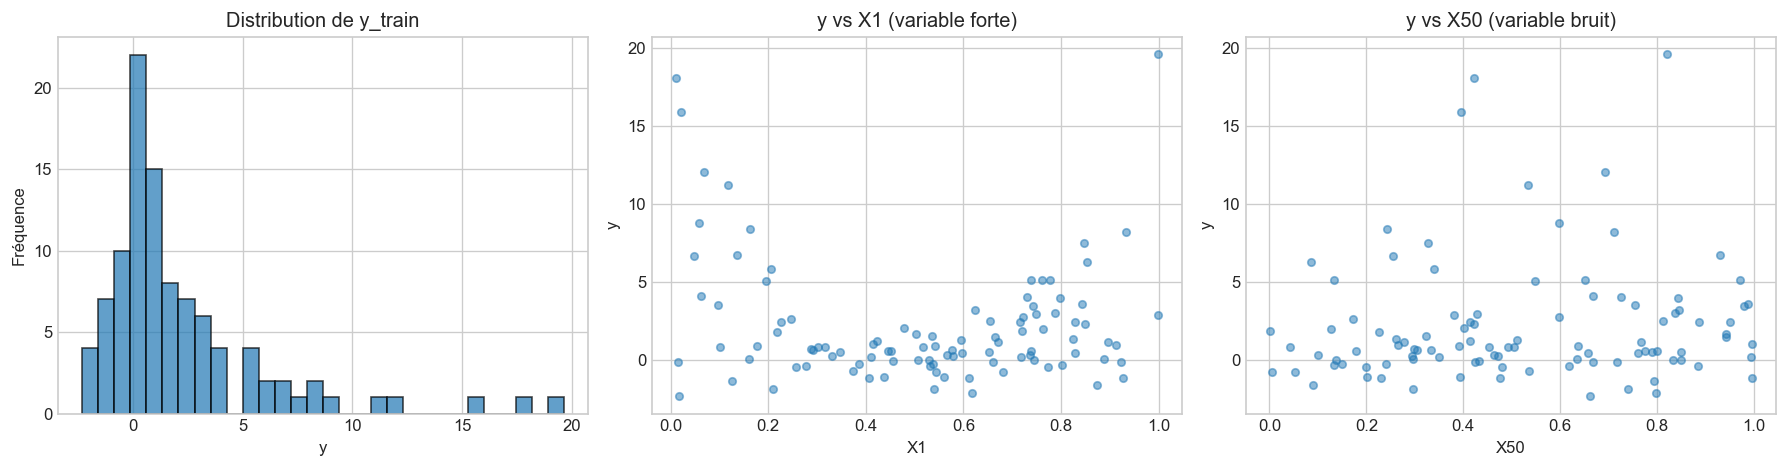

Pour p=200 :
  p_0 calculé      : 5
  log(p)           : 5.30
  % de features    : 2.50%
  Variables fortes : 3 (X1, X2, X3)
  ✓ p_0=5 couvre bien les 3 variables fortes
[INFO] p=200 → p_0=5 (selon article : log(200) ≈ 5.30)

✓ 14 modèles créés :

Baselines :
  - RF
  - ET
  - GBR
  - Lasso
  - ElasticNet

RLT (9 variantes) :
  - RLT_none_k1
  - RLT_none_k2
  - RLT_none_k5
  - RLT_moderate_k1
  - RLT_moderate_k2
  - RLT_moderate_k5
  - RLT_aggressive_k1
  - RLT_aggressive_k2
  - RLT_aggressive_k5

                           ENTRAÎNEMENT ET ÉVALUATION                           

[ 1/14] RF                             ✓ MSE =  13.0656  (  2.9s)
[ 2/14] ET                             ✓ MSE =  13.2401  (  1.7s)
[ 3/14] GBR                            ✓ MSE =   8.4649  (  4.5s)
[ 4/14] Lasso                          ✓ MSE =  23.1611  (  0.0s)
[ 5/14] ElasticNet                     ✓ MSE =  21.6992  (  0.0s)
[ 6/14] RLT_none_k1                    [RLT] Arbre 1/20 construit
[RLT] Arbre 10/20 c

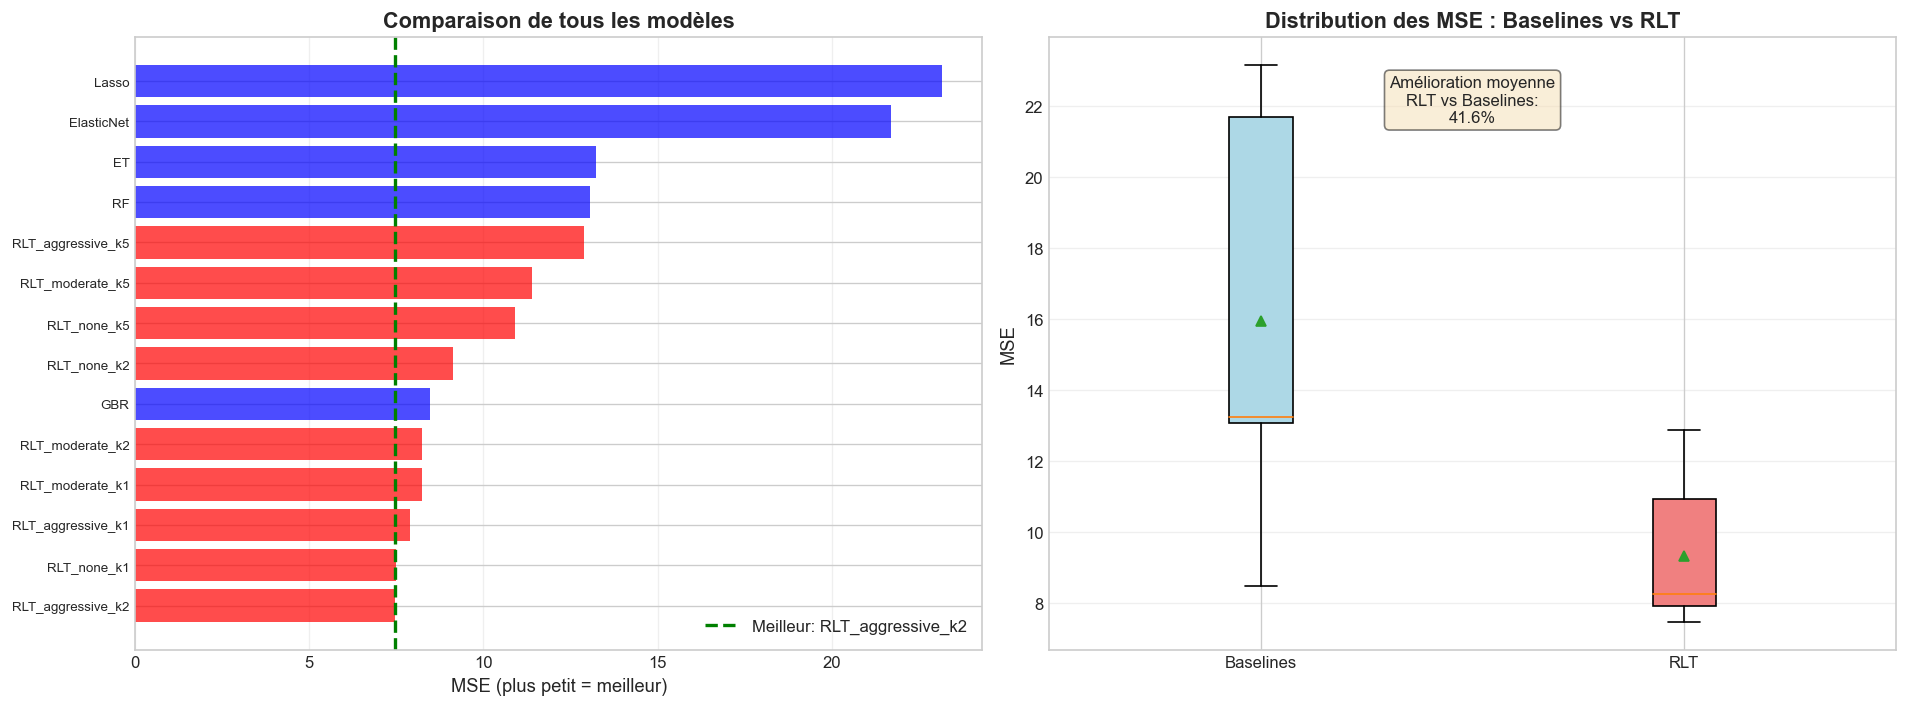

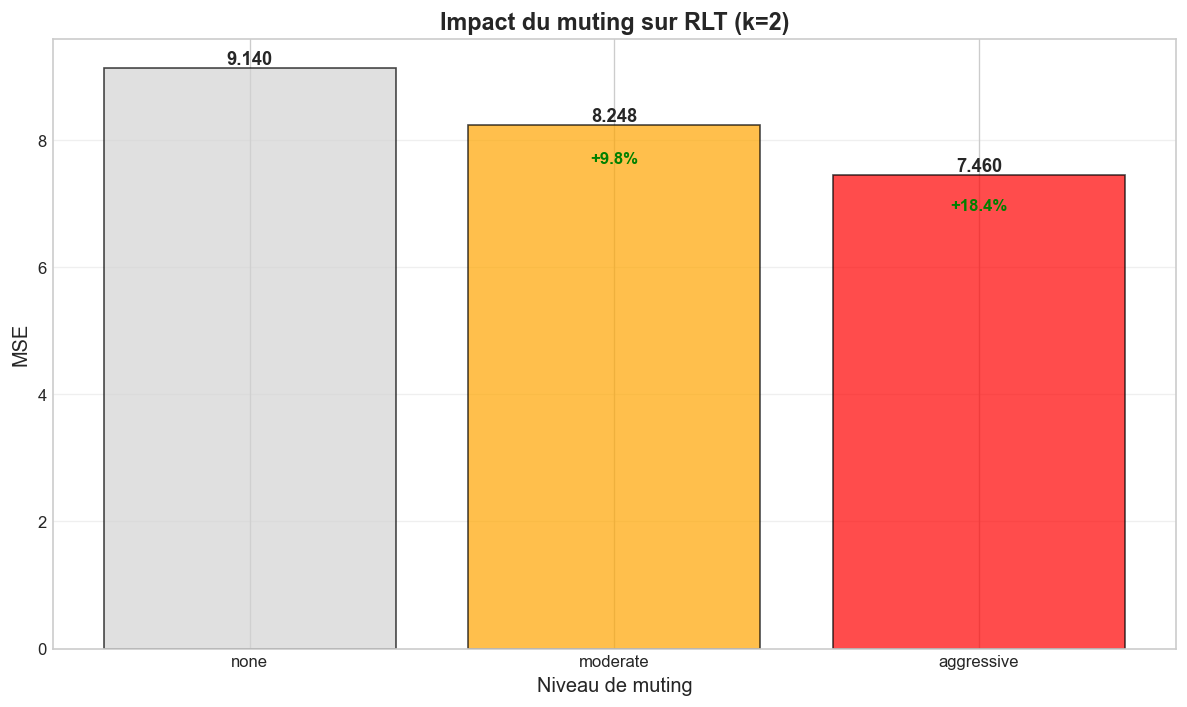


📊 IMPACT DU MUTING (k=2) :
  none         : MSE = 9.1397
  moderate     : MSE = 8.2485
  aggressive   : MSE = 7.4599

  Amélioration vs 'none' :
    moderate     : +9.8%
    aggressive   : +18.4%


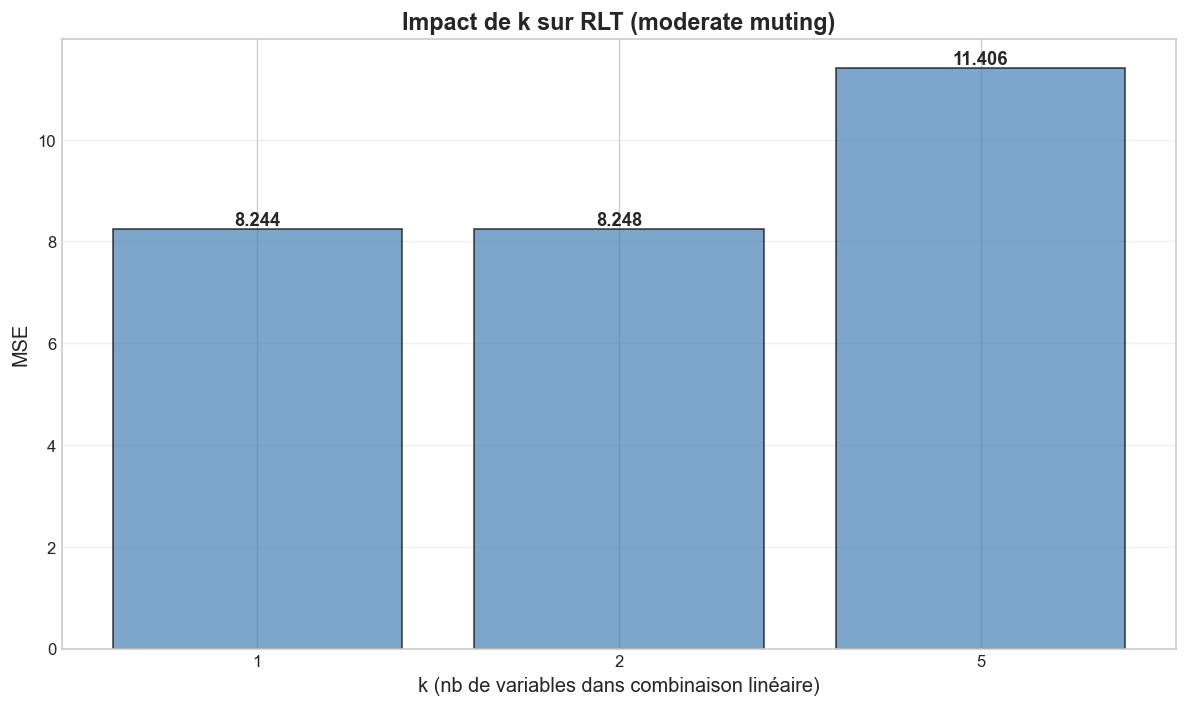


📊 IMPACT DE K (moderate muting) :
  k=1 : MSE = 8.2442
  k=2 : MSE = 8.2485
  k=5 : MSE = 11.4059


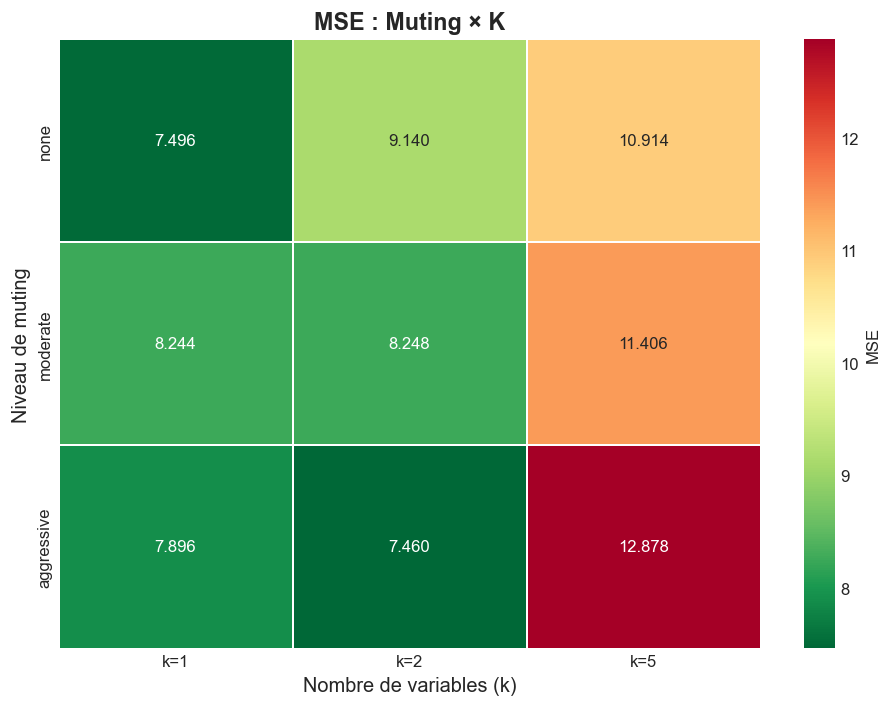


🏆 MEILLEURE CONFIGURATION : muting=aggressive, k=2 (MSE=7.4599)

⏱️  TEMPS D'EXÉCUTION :
            model  train_time  predict_time  total_time     type
       ElasticNet    0.006620      0.001001    0.007622 Baseline
            Lasso    0.010434      0.001003    0.011436 Baseline
               ET    1.719436      0.276630    1.996066 Baseline
               RF    2.877992      0.298273    3.176265 Baseline
              GBR    4.481420      0.005001    4.486421 Baseline
      RLT_none_k2   49.323778      0.134428   49.458205      RLT
RLT_aggressive_k5   51.065581      0.066040   51.131621      RLT
      RLT_none_k1   53.764212      0.075260   53.839472      RLT
  RLT_moderate_k2   66.642757      0.078007   66.720763      RLT
  RLT_moderate_k1   72.272209      0.087725   72.359934      RLT


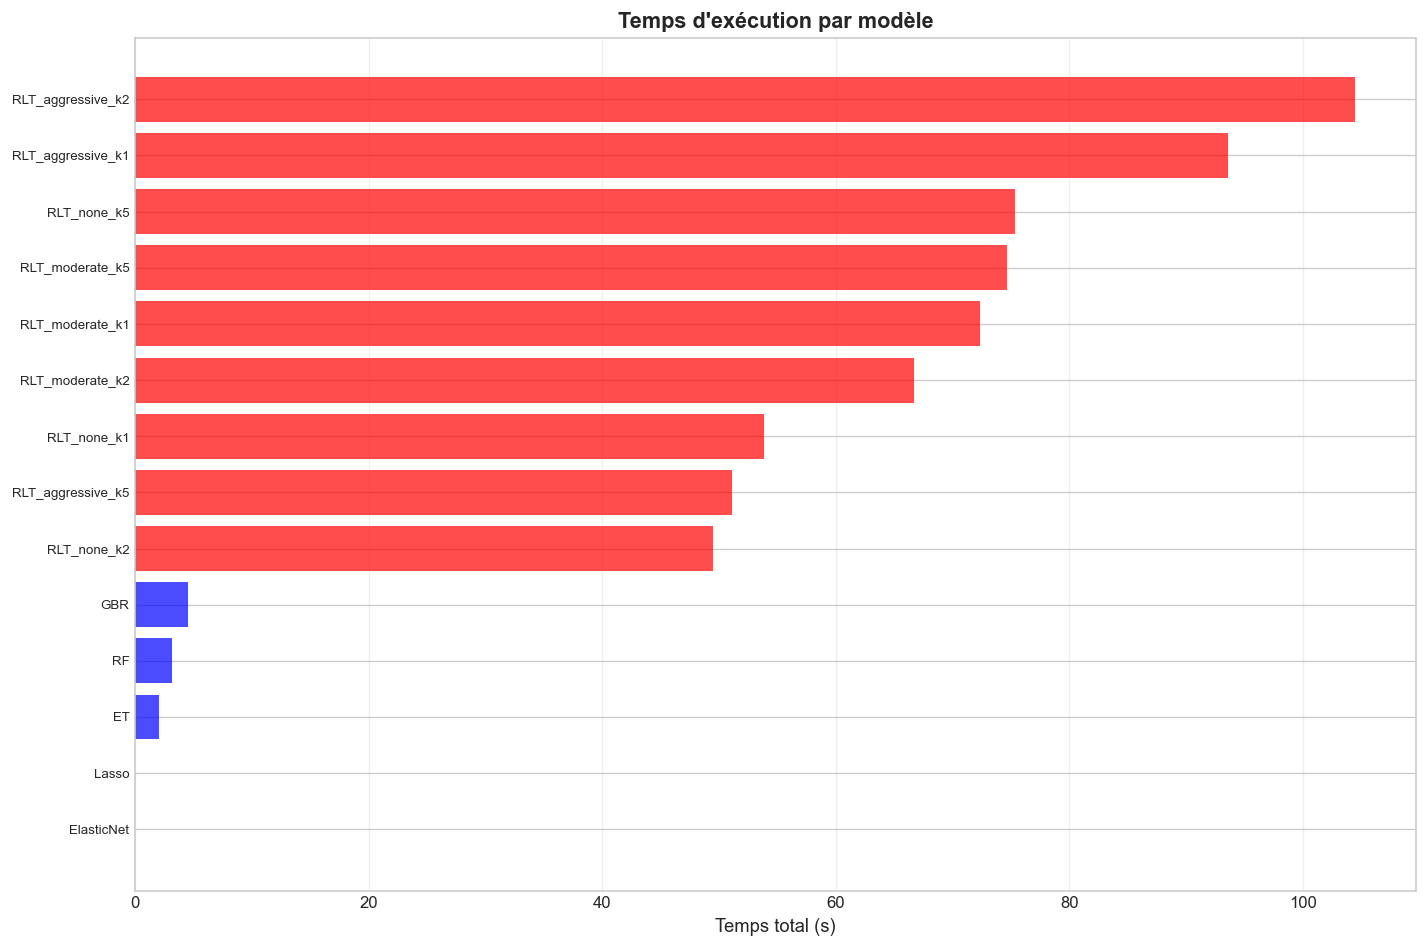


                              RÉCAPITULATIF FINAL                               

📊 DONNÉES :
  n_train = 100, n_test = 1000, p = 200
  Variables fortes : 3 (X1, X2, X3)
  p_0 calculé : 5

🏆 MEILLEUR MODÈLE :
  Nom : RLT_aggressive_k2
  MSE : 7.4599

📈 MEILLEUR RLT vs MEILLEURE BASELINE :
  RLT      : RLT_aggressive_k2    MSE = 7.4599
  Baseline : GBR                  MSE = 8.4649
  ✅ RLT gagne : 11.9% d'amélioration!

⏱️  TEMPS MOYEN :
  Baseline : 1.9s
  RLT      : 71.3s

                                 ✅ TEST TERMINÉ                                 

✓ Résultats sauvegardés : results_scenario2_rlt.csv


In [19]:
# Générer les données
from Models.registry import get_benchmark_models, analyze_rlt_results, compute_p0
p = 200
n_train = 100
n_test = 1000

X_train, y_train, X_test, y_test = generate_scenario2(
    n_train=n_train, 
    n_test=n_test, 
    p=p, 
    random_state=42
)

print(f"✓ Données générées")
print(f"  X_train : {X_train.shape}")
print(f"  X_test  : {X_test.shape}")
print(f"  y_train : min={y_train.min():.2f}, max={y_train.max():.2f}, mean={y_train.mean():.2f}")

# Visualisation rapide
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Distribution de y
axes[0].hist(y_train, bins=30, edgecolor='black', alpha=0.7)
axes[0].set_title('Distribution de y_train')
axes[0].set_xlabel('y')
axes[0].set_ylabel('Fréquence')

# Relation y vs X1 (principale variable)
axes[1].scatter(X_train[:, 0], y_train, alpha=0.5, s=20)
axes[1].set_title('y vs X1 (variable forte)')
axes[1].set_xlabel('X1')
axes[1].set_ylabel('y')

# Relation y vs X50 (variable bruit)
axes[2].scatter(X_train[:, 50], y_train, alpha=0.5, s=20)
axes[2].set_title('y vs X50 (variable bruit)')
axes[2].set_xlabel('X50')
axes[2].set_ylabel('y')

plt.tight_layout()
plt.show()

# %% [markdown]
# ## 3. Vérification de p_0

# %%
# Vérifier le calcul de p_0
p_0_calculated = compute_p0(p)
print(f"Pour p={p} :")
print(f"  p_0 calculé      : {p_0_calculated}")
print(f"  log(p)           : {np.log(p):.2f}")
print(f"  % de features    : {p_0_calculated/p*100:.2f}%")
print(f"  Variables fortes : 3 (X1, X2, X3)")
print(f"  ✓ p_0={p_0_calculated} couvre bien les 3 variables fortes")

# %% [markdown]
# ## 4. Obtenir tous les modèles

# %%
# ✅ IMPORTANT : Passer p pour calcul automatique de p_0
models = get_benchmark_models("regression", p=p, random_state=42)

print(f"\n✓ {len(models)} modèles créés :")
print("\nBaselines :")
for name in models.keys():
    if not name.startswith("RLT_"):
        print(f"  - {name}")

print("\nRLT (9 variantes) :")
for name in models.keys():
    if name.startswith("RLT_"):
        print(f"  - {name}")

# %% [markdown]
# ## 5. Entraînement et évaluation

# %%
results = {}
training_times = {}

print(f"\n{'='*80}")
print(f" ENTRAÎNEMENT ET ÉVALUATION ".center(80))
print(f"{'='*80}\n")

for i, (name, model) in enumerate(models.items(), 1):
    print(f"[{i:2d}/{len(models)}] {name:30s} ", end="", flush=True)
    
    try:
        # Entraînement
        t_start = time.time()
        model.fit(X_train, y_train)
        t_train = time.time() - t_start
        
        # Prédiction
        t_start = time.time()
        y_pred = model.predict(X_test)
        t_pred = time.time() - t_start
        
        # MSE
        mse = mean_squared_error(y_test, y_pred)
        
        results[name] = mse
        training_times[name] = {"train": t_train, "predict": t_pred}
        
        print(f"✓ MSE = {mse:8.4f}  ({t_train:5.1f}s)")
        
    except Exception as e:
        print(f"✗ ERREUR: {str(e)[:50]}")
        results[name] = np.nan
        training_times[name] = {"train": np.nan, "predict": np.nan}

print(f"\n{'='*80}\n")

# %% [markdown]
# ## 6. Analyse des résultats

# %%
# Analyse automatique
analyze_rlt_results(results)

# %% [markdown]
# ## 7. Visualisations

# %%
# Créer un DataFrame pour analyse
df_results = pd.DataFrame([
    {
        "model": name,
        "mse": mse,
        "type": "RLT" if name.startswith("RLT_") else "Baseline",
        "muting": name.split("_")[1] if name.startswith("RLT_") else "N/A",
        "k": name.split("_k")[1] if "_k" in name else "N/A",
    }
    for name, mse in results.items()
]).sort_values("mse")

print("\n📊 TOP 10 MODÈLES :")
print(df_results.head(10).to_string(index=False))

# %% [markdown]
# ### 7.1 Comparaison globale

# %%
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1 : Tous les modèles
ax = axes[0]
colors = ['red' if name.startswith("RLT_") else 'blue' for name in df_results["model"]]
bars = ax.barh(range(len(df_results)), df_results["mse"], color=colors, alpha=0.7)
ax.set_yticks(range(len(df_results)))
ax.set_yticklabels(df_results["model"], fontsize=8)
ax.set_xlabel("MSE (plus petit = meilleur)", fontsize=11)
ax.set_title("Comparaison de tous les modèles", fontsize=13, fontweight='bold')
ax.axvline(x=df_results["mse"].iloc[0], color='green', linestyle='--', 
           linewidth=2, label=f'Meilleur: {df_results["model"].iloc[0]}')
ax.legend()
ax.grid(axis='x', alpha=0.3)

# Plot 2 : RLT vs Baselines (boxplot)
ax = axes[1]
rlt_mse = [v for k, v in results.items() if k.startswith("RLT_")]
baseline_mse = [v for k, v in results.items() if not k.startswith("RLT_")]

bp = ax.boxplot([baseline_mse, rlt_mse], 
                 labels=['Baselines', 'RLT'],
                 patch_artist=True,
                 showmeans=True)
bp['boxes'][0].set_facecolor('lightblue')
bp['boxes'][1].set_facecolor('lightcoral')
ax.set_ylabel("MSE", fontsize=11)
ax.set_title("Distribution des MSE : Baselines vs RLT", fontsize=13, fontweight='bold')
ax.grid(axis='y', alpha=0.3)

# Annotation
improvement = (np.mean(baseline_mse) - np.mean(rlt_mse)) / np.mean(baseline_mse) * 100
ax.text(1.5, ax.get_ylim()[1] * 0.9, 
        f'Amélioration moyenne\nRLT vs Baselines:\n{improvement:.1f}%',
        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5),
        fontsize=10, ha='center')

plt.tight_layout()
plt.show()

# %% [markdown]
# ### 7.2 Impact du muting (pour k=2)

# %%
# Extraire les résultats pour k=2
k2_results = {k: v for k, v in results.items() if "_k2" in k}

if k2_results:
    muting_levels = []
    mse_values = []
    
    for mut in ["none", "moderate", "aggressive"]:
        key = f"RLT_{mut}_k2"
        if key in k2_results:
            muting_levels.append(mut)
            mse_values.append(k2_results[key])
    
    fig, ax = plt.subplots(figsize=(10, 6))
    
    colors_map = {"none": "lightgray", "moderate": "orange", "aggressive": "red"}
    colors = [colors_map[m] for m in muting_levels]
    
    bars = ax.bar(muting_levels, mse_values, color=colors, alpha=0.7, edgecolor='black')
    
    # Ajouter les valeurs sur les barres
    for bar, val in zip(bars, mse_values):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{val:.3f}',
                ha='center', va='bottom', fontsize=11, fontweight='bold')
    
    # Ajouter les pourcentages d'amélioration
    if len(mse_values) > 1:
        baseline_mse = mse_values[0]  # none
        for i, (mut, mse) in enumerate(zip(muting_levels[1:], mse_values[1:]), 1):
            improvement = (baseline_mse - mse) / baseline_mse * 100
            ax.text(i, mse * 0.95, f'{improvement:+.1f}%',
                   ha='center', va='top', fontsize=10, color='green', fontweight='bold')
    
    ax.set_xlabel("Niveau de muting", fontsize=12)
    ax.set_ylabel("MSE", fontsize=12)
    ax.set_title("Impact du muting sur RLT (k=2)", fontsize=14, fontweight='bold')
    ax.grid(axis='y', alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    print("\n📊 IMPACT DU MUTING (k=2) :")
    for mut, mse in zip(muting_levels, mse_values):
        print(f"  {mut:12s} : MSE = {mse:.4f}")
    
    if len(mse_values) > 1:
        print("\n  Amélioration vs 'none' :")
        baseline_mse = mse_values[0]
        for mut, mse in zip(muting_levels[1:], mse_values[1:]):
            improvement = (baseline_mse - mse) / baseline_mse * 100
            print(f"    {mut:12s} : {improvement:+.1f}%")

# %% [markdown]
# ### 7.3 Impact de k (avec moderate muting)

# %%
# Extraire les résultats pour moderate muting
moderate_results = {k: v for k, v in results.items() if "_moderate_" in k}

if moderate_results:
    k_values = []
    mse_values = []
    
    for k in [1, 2, 5]:
        key = f"RLT_moderate_k{k}"
        if key in moderate_results:
            k_values.append(k)
            mse_values.append(moderate_results[key])
    
    fig, ax = plt.subplots(figsize=(10, 6))
    
    bars = ax.bar([str(k) for k in k_values], mse_values, 
                   color='steelblue', alpha=0.7, edgecolor='black')
    
    # Ajouter les valeurs
    for bar, val in zip(bars, mse_values):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{val:.3f}',
                ha='center', va='bottom', fontsize=11, fontweight='bold')
    
    ax.set_xlabel("k (nb de variables dans combinaison linéaire)", fontsize=12)
    ax.set_ylabel("MSE", fontsize=12)
    ax.set_title("Impact de k sur RLT (moderate muting)", fontsize=14, fontweight='bold')
    ax.grid(axis='y', alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    print("\n📊 IMPACT DE K (moderate muting) :")
    for k, mse in zip(k_values, mse_values):
        print(f"  k={k} : MSE = {mse:.4f}")

# %% [markdown]
# ### 7.4 Heatmap : Muting × K

# %%
# Créer une matrice muting × k
muting_levels = ["none", "moderate", "aggressive"]
k_values = [1, 2, 5]

heatmap_data = []
for mut in muting_levels:
    row = []
    for k in k_values:
        key = f"RLT_{mut}_k{k}"
        row.append(results.get(key, np.nan))
    heatmap_data.append(row)

heatmap_df = pd.DataFrame(heatmap_data, 
                          index=muting_levels, 
                          columns=[f"k={k}" for k in k_values])

fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(heatmap_df, annot=True, fmt='.3f', cmap='RdYlGn_r', 
            cbar_kws={'label': 'MSE'}, ax=ax, linewidths=1)
ax.set_title("MSE : Muting × K", fontsize=14, fontweight='bold')
ax.set_xlabel("Nombre de variables (k)", fontsize=12)
ax.set_ylabel("Niveau de muting", fontsize=12)

plt.tight_layout()
plt.show()

# Trouver le meilleur
best_config = heatmap_df.min().min()
best_idx = np.where(heatmap_df.values == best_config)
best_mut = muting_levels[best_idx[0][0]]
best_k = k_values[best_idx[1][0]]
print(f"\n🏆 MEILLEURE CONFIGURATION : muting={best_mut}, k={best_k} (MSE={best_config:.4f})")

# %% [markdown]
# ## 8. Temps d'exécution

# %%
# Analyse des temps
df_times = pd.DataFrame([
    {
        "model": name,
        "train_time": times["train"],
        "predict_time": times["predict"],
        "total_time": times["train"] + times["predict"],
        "type": "RLT" if name.startswith("RLT_") else "Baseline"
    }
    for name, times in training_times.items()
]).sort_values("total_time")

print("\n⏱️  TEMPS D'EXÉCUTION :")
print(df_times.head(10).to_string(index=False))

# Visualisation
fig, ax = plt.subplots(figsize=(12, 8))
colors = ['red' if t == "RLT" else 'blue' for t in df_times["type"]]
bars = ax.barh(range(len(df_times)), df_times["total_time"], color=colors, alpha=0.7)
ax.set_yticks(range(len(df_times)))
ax.set_yticklabels(df_times["model"], fontsize=8)
ax.set_xlabel("Temps total (s)", fontsize=11)
ax.set_title("Temps d'exécution par modèle", fontsize=13, fontweight='bold')
ax.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

# %% [markdown]
# ## 9. Récapitulatif final

# %%
print("\n" + "="*80)
print(" RÉCAPITULATIF FINAL ".center(80))
print("="*80)

print(f"\n📊 DONNÉES :")
print(f"  n_train = {n_train}, n_test = {n_test}, p = {p}")
print(f"  Variables fortes : 3 (X1, X2, X3)")
print(f"  p_0 calculé : {compute_p0(p)}")

print(f"\n🏆 MEILLEUR MODÈLE :")
best_model = df_results.iloc[0]
print(f"  Nom : {best_model['model']}")
print(f"  MSE : {best_model['mse']:.4f}")

print(f"\n📈 MEILLEUR RLT vs MEILLEURE BASELINE :")
best_rlt = df_results[df_results["type"] == "RLT"].iloc[0]
best_baseline = df_results[df_results["type"] == "Baseline"].iloc[0]
print(f"  RLT      : {best_rlt['model']:20s} MSE = {best_rlt['mse']:.4f}")
print(f"  Baseline : {best_baseline['model']:20s} MSE = {best_baseline['mse']:.4f}")

improvement = (best_baseline['mse'] - best_rlt['mse']) / best_baseline['mse'] * 100
if improvement > 0:
    print(f"  ✅ RLT gagne : {improvement:.1f}% d'amélioration!")
else:
    print(f"  ⚠️  Baseline gagne : {-improvement:.1f}% meilleure")

print(f"\n⏱️  TEMPS MOYEN :")
print(f"  Baseline : {df_times[df_times['type']=='Baseline']['total_time'].mean():.1f}s")
print(f"  RLT      : {df_times[df_times['type']=='RLT']['total_time'].mean():.1f}s")

print("\n" + "="*80)
print(" ✅ TEST TERMINÉ ".center(80))
print("="*80 + "\n")

# %% [markdown]
# ## 10. Sauvegarder les résultats

# %%
# Sauvegarder dans un CSV
df_results.to_csv("results_scenario2_rlt.csv", index=False)
print("✓ Résultats sauvegardés : results_scenario2_rlt.csv")

# Sauvegarder les figures
# (décommenter si vous voulez sauvegarder)
# plt.savefig("comparison_rlt_scenario2.png", dpi=150, bbox_inches='tight')
# print("✓ Figures sauvegardées")